# House Price Linear Regression

Note: Data was provided by University of Washington through Coursera (Machine Learning Specialization)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('home_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


## Exploratory Data Analysis

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
data['yr_built'].max()

2015

### Plotting Price

In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Plotting Price against many different variables can be easily done through a simple for loop.

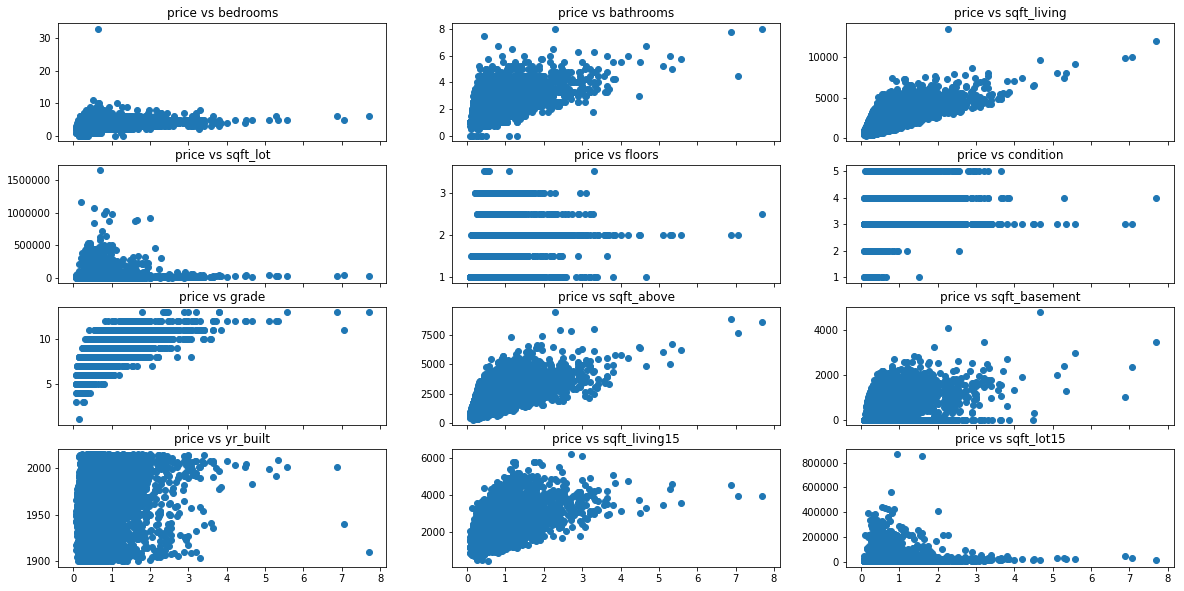

In [10]:
to_plot = ['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','condition','grade','sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']


import itertools
d = dict(zip(to_plot,list(itertools.product(list(range(4)),list(range(3))))))

fig, axes =plt.subplots(4, 3, sharex='col', figsize = (20,10))

for key, value in d.items():
    axes[value].scatter(data['price']/1000000,data[key])
    axes[value].set_title('price vs '+key)

In [16]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors
]

## Preprocessing

Zipcode should be encoded.

In [31]:
data = pd.concat([data,pd.get_dummies(data['zipcode'])], axis=1)

In [33]:
data.columns

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
             'zipcode',           'lat',          'long', 'sqft_living15',
          'sqft_lot15',           98001,           98002,           98003,
                 98004,           98005,           98006,           98007,
                 98008,           98010,           98011,           98014,
                 98019,           98022,           98023,           98024,
                 98027,           98028,           98029,           98030,
                 98031,           98032,           98033,           98034,
                 98038,           98039,           98040,           98042,
                 98045,           98052,           98053,           98055,
                 98056,  

In [32]:
data.shape

(21613, 91)

In [36]:
from sklearn.model_selection import train_test_split
X = data.drop(['id','date', 'price','zipcode'],axis = 1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.33, random_state = 0)


In [38]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
8868,3,1.75,1260,1111,2.0,0,0,3,8,1260,...,0,0,0,0,0,0,0,0,0,0
19005,2,1.00,1060,1600,2.0,0,0,3,7,1060,...,0,0,0,0,0,0,0,0,0,0
13625,3,1.75,2770,39927,1.0,0,0,4,8,1580,...,0,0,0,0,0,0,0,0,0,0
9782,3,1.50,1460,8505,1.0,0,0,4,7,1460,...,0,0,0,0,0,0,0,0,0,0
6730,4,3.25,1790,2460,2.0,0,0,4,7,1100,...,0,0,0,0,0,0,0,0,0,0


In [42]:
(X_train.shape, y_train.shape)

((14480, 87), (14480,))

In [43]:
(X_test.shape, y_test.shape)

((7133, 87), (7133,))

## Model Building


In [219]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#reg = LinearRegression().fit(X_train,y_train)
#reg = Lasso(max_iter=9000).fit(X_train,y_train)
reg = Ridge(alpha=.02).fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [220]:
y_pred.shape

(7133,)

In [221]:
reg.score(X_train,y_train)

0.81404761242719281

## Evaluation

In [222]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.sqrt(mean_squared_error(y_test,y_pred))


172484.64421836421

In [223]:
r2_score(y_test,y_pred)

0.79408087323988941

In [229]:
pd.DataFrame(list(zip(X_test.columns,reg.coef_)),columns = ['feature','coef']).head(20)

,feature,coef
0,bedrooms,-22050.101
1,bathrooms,19428.812
2,sqft_living,105.901
3,sqft_lot,0.323
4,floors,-39889.584
5,waterfront,696786.870
6,view,54824.607
7,condition,26438.017
8,grade,59771.374
9,sqft_above,90.248


In [228]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # suppress scientific notation
pd.DataFrame(list(zip(y_test.values,y_pred)))


,0,1
0,297000,306610.814
1,1578000,1454383.586
2,562100,568098.646
3,631500,760618.443
4,780000,855169.374
5,485000,389034.449
6,340000,336941.367
7,335606,386563.148
8,425000,479641.943
9,490000,1336062.045
